In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams

In [3]:
easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [4]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [5]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

In [6]:
import pickle
from src.agents.acer.acer_agent import ACERAgent

import torch
import numpy as np

torch.manual_seed(101)
np.random.seed(101)

training_results = []

for env_type, env in zip(["easy", "medium", "hard"], [easy_env, medium_env, hard_env]):
    print(f"Training ACER on {env_type} environment...")
    train_parameters = {
        "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
        "action_dim": 3,
        "action_space": [0, 1, 2],
        "hidden_dim": 64,
        "gamma": 0.99,
        "episodes": 50_000,
        "learning_rate": 3e-5,
        "timeout": 200,
        "device": "cpu",
        "kl_beta": 0.01,
        "replay_ratio": 5,
        "clip": 10,
        "replay_buffer_size": 200,
        "early_stop": 500,
    }

    agent = ACERAgent(env, train_parameters)
    result = agent.train(train_parameters["episodes"])

    filename = f"../checkpoints/final_acer/{env_type}.pt"
    agent.save(filename)

    with open(f"{env_type}.pkl", "wb") as f:
        pickle.dump(result, f)

    training_results.append(result)

Training ACER on easy environment...


Training: 100%|██████████| 50000/50000 [27:00<00:00, 30.86episode/s, average_return=85.9]    


Model and optimizer successfully saved to ../checkpoints/final_acer/easy.pt
Training ACER on medium environment...


Training: 100%|██████████| 50000/50000 [35:56<00:00, 23.19episode/s, average_return=-57.7]   


Model and optimizer successfully saved to ../checkpoints/final_acer/medium.pt
Training ACER on hard environment...


Training:   1%|▏         | 701/50000 [07:35<8:53:50,  1.54episode/s, average_return=-86.6] 

Model and optimizer successfully saved to ../checkpoints/final_acer/hard.pt


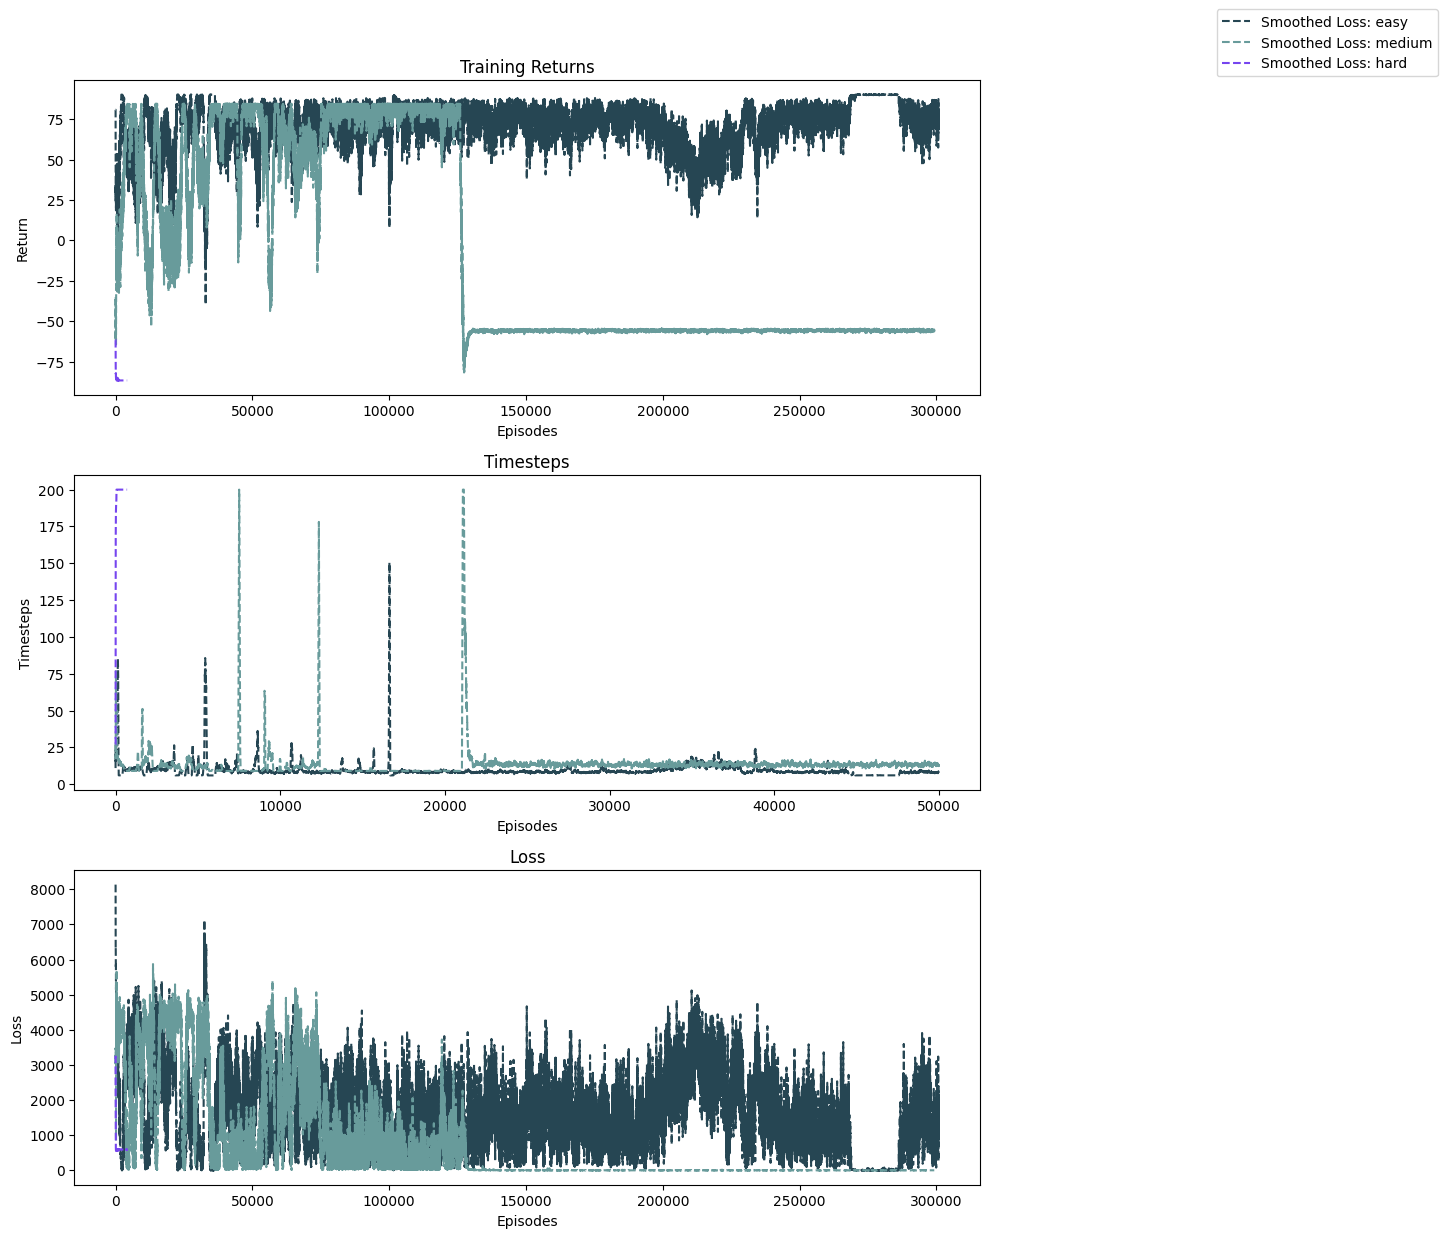

In [7]:
ACERAgent.plot_multiple_training_result(
    training_results=training_results, hyperparams=["easy", "medium", "hard"]
)